### Встановлюємо та імпортуємо потрібні бібліотеки###      



In [ ]:
!pip install factor_analyzer
import pandas as pd 
from factor_analyzer import FactorAnalyzer
from matplotlib import pyplot
from google.colab import drive

     |████████████████████████████████| 40kB 3.8MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40380 sha256=552d8d190851ee433c8b567ece5a5dd83383e20a1aae79b809c5fe5952dd9127
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/A17.txt", header=None)
df.columns = [str(i+1)  for i in range(12)]

Нормалізуємо данні 

In [ ]:


from sklearn import preprocessing
x = df.iloc[:, :12].values 
x_scaled = preprocessing.scale(x)
df = pd.DataFrame(x_scaled)

df.iloc[:, 0:12].describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-3.197442e-17,-1.953993e-17,6.519230e-17,2.282619e-17,2.735590e-17,5.551115e-17,3.819167e-18,-5.497824e-17,-1.447731e-17,-4.729550e-17,3.623768e-17,-2.398082e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-9.554146e-01,-5.053912e-01,-7.059817e-01,-4.874389e+00,-7.145119e+00,-5.354375e-01,-5.881503e+00,-5.027389e+00,-3.816852e+00,-1.371898e+00,-6.286319e-01,-9.167249e-01
25%,-4.200226e-01,-4.041808e-01,-4.265225e-01,1.104236e-01,-1.179716e-01,-4.032513e-01,1.462367e-01,3.593095e-02,-3.986637e-01,-4.562831e-01,-3.668191e-01,-3.588837e-01
50%,-3.349250e-01,-2.183535e-01,-2.804526e-01,2.604708e-01,1.392913e-01,-2.269483e-01,1.959363e-01,5.807599e-02,-3.202658e-01,-3.876190e-01,-3.147819e-01,-2.671438e-01
75%,3.338404e-03,-1.219506e-01,-8.359266e-02,4.024047e-01,3.948358e-01,-1.141045e-01,3.074635e-01,3.739317e-01,5.337261e-01,1.606550e-01,-5.713530e-02,-1.030255e-01
max,5.870450e+00,5.076931e+00,6.118868e+00,4.809880e-01,3.074891e+00,5.507914e+00,7.831890e-01,1.114427e+00,2.268604e+00,4.898061e+00,5.293412e+00,5.364067e+00


Будуємо корелляційну матрицю 

In [ ]:
corrMatrix = df.corr()

Щоб наша матриця виглядала більш зрозуміло використаємо бібліотеку seaborn

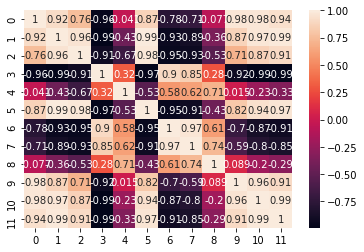

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix, annot=True)
plt.show()

Далі знаєдемо власні значення та впорядкуємо значимість факторів 

[9.45819732e+00 2.09972434e+00 3.76168381e-01 3.53880214e-02
 1.54036746e-02 7.71575539e-03 3.59561486e-03 2.34252383e-03
 7.16424497e-04 4.99865350e-04 1.96437140e-04 5.16424426e-05] [ 9.40735216  2.33011776  0.58293578  0.39862922  0.24854688  0.08196732
 -0.01262323 -0.07211354 -0.16165733 -0.22342581 -0.28797033 -0.34379778]


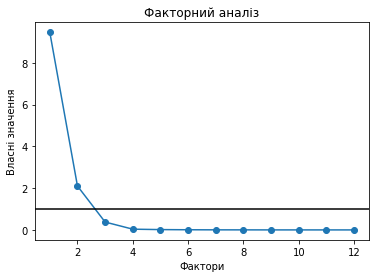

In [ ]:
import scipy.linalg as la

eig = la.eigh(corrMatrix, eigvals_only=False)

fa = FactorAnalyzer()
fa.fit(df, 5)

ev, v = fa.get_eigenvalues()
print(ev, v)
# plt.plot(ev)

plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Факторний аналіз')
plt.xlabel('Фактори')
plt.ylabel('Власні значення')
plt.axhline(y=1,c='k')

Тепер шукаємо вектори

In [ ]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(df)
loads = fa.loadings_
print(loads)

[[ 0.99246052 -0.07472662  0.06919883]
 [ 0.92152293 -0.26601758 -0.27696071]
 [ 0.77606532 -0.36588631 -0.51112233]
 [-0.96002242  0.21292516  0.1725584 ]
 [-0.06996764  0.46019309  0.88243777]
 [ 0.87585755 -0.30636541 -0.36917619]
 [-0.77155629  0.51957714  0.32039209]
 [-0.685075    0.66016909  0.3028053 ]
 [-0.02891926  0.93934642  0.31487882]
 [ 0.99092614  0.11134857  0.03825335]
 [ 0.98199045 -0.14554389 -0.1022115 ]
 [ 0.95081055 -0.22124722 -0.18785966]]


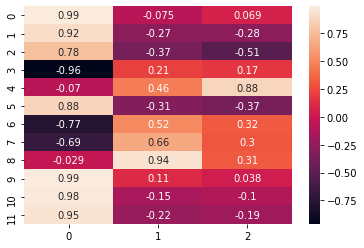

In [ ]:
sn.heatmap(loads, annot=True)
plt.show()

In [ ]:
df.iloc[:,0:11:4]

,0,4,8
0,-0.365603,-0.649905,0.034073
1,-0.336108,-0.564103,-0.006790
2,-0.315491,-0.502808,-0.047501
3,-0.309785,-0.480677,-0.087434
4,-0.323331,-0.504546,-0.123791
...,...,...,...
4995,4.637978,0.038493,-2.516300
4996,4.072934,-0.935060,-2.771603
4997,3.378540,-1.805547,-2.803743
4998,2.588425,-2.546100,-2.653304


Факторний аналіз k-Means

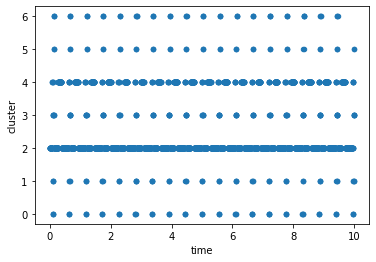

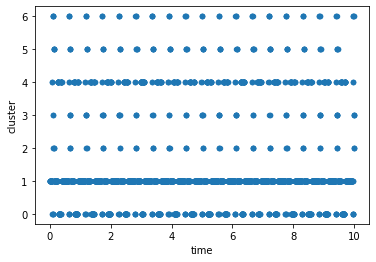

In [ ]:
from sklearn.cluster import KMeans

params12 = KMeans(n_clusters=7, random_state=0).fit_predict(df.iloc[:,0:12])
  #print("Point", i, "have cluster: ", params12[i])
dataFrame12 = pd.DataFrame({"cluster": params12, "time":[i*0.002 for i in range(0,5000)]})
dataFrame12.plot.scatter(x='time', y='cluster')

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/A17.txt", header=None)

params3 = KMeans(n_clusters=7, random_state=0).fit_predict(df.iloc[:,0:11:4])

dataFrame3 = pd.DataFrame({"cluster": params3, "time":[i*0.002 for i in range(0,5000)]})
dataFrame3.plot.scatter(x='time', y='cluster')

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/A17.txt", header=None)